IMPORTING ALL THE PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

import string
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import tokenize
from nltk.tokenize import sent_tokenize


In [3]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ANALYSING THE DATA

In [4]:
df=pd.read_csv("sentimentdataset.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [13]:
#Dropping unnecessary columns

df=df.drop(df[['Unnamed: 0.1','Unnamed: 0']],axis=1,inplace=False)

In [14]:
#Removing all the white spaces from the text columns

df['Sentiment']=df['Sentiment'].str.strip()
df['Text']=df['Text'].str.strip()
df['User']=df['User'].str.strip()
df['Platform']=df['Platform'].str.strip()
df['Hashtags']=df['Hashtags'].str.strip()
df['Country']=df['Country'].str.strip()

In [15]:
from datetime import datetime

In [16]:
#Changing from Object to Datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [17]:
#Changing from float to int
df['Retweets']=df['Retweets'].astype(int)
df['Likes']=df['Likes'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    int64         
 7   Likes      732 non-null    int64         
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 74.5+ KB


In [19]:
#checking fro null values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [20]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

FEATURE ENGINEERING

creating a new column for Hashtags.

In [21]:
from collections import defaultdict

# Define themes and initialize groups
def categorize_hashtags(Hashtags):
    def flatten_hashtags(group):
        return set(tag.strip() for item in group for tag in item.split())
        
    Emotions_Sentiment= flatten_hashtags([ '#Gratitude #PositiveVibes','#Reflection #Future','#Acceptance #BeautifulChaos','#Acceptance #Challenges','#Acceptance #Diversity', '#Admiration #Volunteers', '#Affection #PositiveVibes',
 '#Ambivalence #AutumnWaltz ', ' #Grateful #GuidingStar ', '#Ambivalence #ConflictingEmotions','#Ambivalence #ConflictingFeelings', '#Ambivalence #CrossroadsConfusion', '#Ambivalence #ShadesOfUncertainty', '#Ambivalence #UncertainChoices', '#Anger #Argument','#Arousal #Excitement', '#Bitter #Unfairness',
 '#WinterBlues #Mood', '#Zest #FieldsOfEnthusiasm ', ' #Compassionate #TearsOfEmpathy ', '#Tenderness #LoveNote', '#Anxiety #Worry', '#Apprehensive #StormOfDoubt', '#Betrayal #ClosingWalls', '#Heartbreak #CalmAfterStorm',
 '#Betrayal #ReverberatingPromises', '#Betrayal #ShatteredTrust', '#Betrayal #ShatteredVows', '#Solitude #ShadowConversation',
 '#BitterExperience #CustomerService', '#Bitterness #BitterAftertaste', ' #Overwhelmed #DrowningSoul', '#Bitterness #IciclesOfResentment', ' #Loneliness #StarlessSky',
 '#Bitterness #StainedTrust', ' #Desolation #WhisperedLoss', '#Bitterness #WoundedHeart', '#Boredom #LackOfInterest', '#Boredom #Monotony',
 '#Boredom #Stagnation', '#Calmness #InnerPeace', '#Calmness #Mindfulness', '#Calmness #PeacefulMind', '#Confidence #OvercomingAnxiety', '#Confident #DanceOfLife', '#Hopeful #BrighterTomorrows',
 '#Confident #FootprintsOfAssuredness', '#Confusion #DecisionMaking', '#Confusion #LabyrinthOfThoughts', '#Confusion #LifeChoices', '#Confusion #LifePuzzle',
 '#Confusion #MakingSense', '#Confusion #PerplexedMind', '#Confusion #ThoughtLabyrinth', '#Numbness #StoicResilience', '#Numbness #StoicFacade',
 '#Numbness #EmotionalStorms', '#Zest #CarefreeSpirit', '#Numbness #EmotionalStorms', '#Numbness #EmotionalShield', '#Numbness #EmotionalShield',
 '#Surprise #OldFriends', '#Surprise #HiddenGem', '#Surprise #Gift', '#Resilience #StandingTall', '#Resentment #Unforgiving', '#Resentment #BrokenTrust',
 '#Resentment #Bitterness', '#Rejuvenation #SeasideEscape', '#Regret #PastCurrents', '#Loss #ForgottenLove', '#Regret #PastChoices', '#Regret #MissedChances', '#Regret #HauntedPast',
 '#Regret #FadingPossibilities', '#Desperation #GlimmerOfHope', '#Despair #UnraveledHope', ' #Loss #SilentSurrender', '#Despair #Struggle', '#Despair #LabyrinthOfHopelessness',
 '#Despair #Hopeless', '#Despair #EndlessReverberation', ' #Sorrow #AutumnLeaves', '#Despair #EndlessDarkness', '#Despair #EchoingSilence', ' #Bitterness #ResentmentWeb',
 '#Despair #DeepDescent', ' #Desolation #UntoldSorrows', '#Despair #DarkDays', '#Despair #AbyssOfHeartache', '#Desolation #ShatteredHopes', ' #Grief #LostLoveLonging',
 '#Ruins #ShatteredDreams', '#Determination #UnparalleledHeights', '#Determination #SculptingDreams', '#Determination #ExtraordinaryPath', '#Determination #DreamsIntoReality',
 '#Determination #CyclingChampion', '#Determination #Challenges', '#Determination #AchieveTheImpossible', '#Resilience #TightropeWalk', '#Isolation #SilentSolitude',
 '#EmotionalStorm #SadnessWhirlwind', '#Empathetic #LanternOfCompassion', '#Empathetic #TapestryOfUnderstanding ', '#Envious #DesireForKeys',
 '#Envy #Desire', '#Envy #Success', '#Sorrow #SymphonyOfLoss', '#Spark #InspirationIgnited', '#Gratitude #Blessed', '#Grief #LostJoyFootsteps', '#Loneliness #CrashingWaves',
 '#Grief #MelancholicMelody', '#Betrayal #PoisonedTrust', '#Grief #Tears', '#Grief #TornApart', '#Heartbreak #LostLove', '#Heartbreak #RippleOfDespair', '#Grief #SilentTears', '#Helplessness #Overwhelmed',
 '#Helplessness #Struggling', '#Hope #BusinessVenture', '#Hope #NewBeginnings', '#Hope #Optimism', '#Hope #PersonalDevelopment', '#Hopeful #SunriseOfPossibilities',
 '#Imagination #LiteraryEscape', '#Vibrancy #MarketStories', '#Joy #SimpleMoments', '#Happiness #SpiritLifter', '#Darkness #SoulEngulfed', '#Desolation #ScatteredHope', '#Regret #PathOfRemorse',
 '#Devastated #EchoesOfShatteredDreams', '#Devastated #WindsOfBrokenPromise', '#Disappointed #BadService', '#Disappointed #Project', '#Disappointment #CrushedHopes',
 '#Frustrated #LabyrinthOfMiscommunication', '#Frustrated #MosaicOfDisappointment', '#Frustrated #SlippingThreads', '#Envious #BitterPill', '#Frustrated #UnsolvablePuzzle', '#Envious #GildedPrize',
 '#Frustration #EmotionalOutburst', '#Frustration #EmotionalOutburst', '#Frustration #Obstacles', '#Gratitude #ShowerOfThankfulness', '#Gratitude #SmallJoys', '#Gratitude #Supportive', '#Gratitude #ThankfulMelody', '#Gratitude #WarmTea',
 '#Grief #EmotionalStorm', '#Grief #Loss', '#Grief #LostFriendship', '#Overwhelmed #BouldersOfExhaustion', '#Overwhelmed #MinotaurOfPressure', '#Dismissive #ImpenetrableWalls',
 '#Dismissive #IndifferencePerformance', '#Kindness #ActsOfKindness', '#Kindness #Humanity', '#Kindness #HumanityRestored','#Captivation #GladiatorTales','#Euphoria #PerfectPuzzle',
'#Euphoria #ProductLaunchSuccess','#Excitement #BookTime','#Excitement #IgnitedSoul','#Excitement #SnowfallMagic','#Excitement #SymphonyOfSpeed','#Excitement #UrbanEnergy',
'#Friendship #CamaraderieBlooms','#Happiness #BoundlessLaughter','#Happiness #Celebration','#Joy #EndlessSmiles','#Kindness #LoveStitches','#Love #RhythmOfAffection',
'#Love #SpreadLove','#Intimidation #FacingFear', '#Intimidation #Fear', '#Intrigue #AbstractArt', '#Isolation #EmotionalWinter', '#Jealous #BloomingAchievements',
 '#Jealous #GreenEyedMonster', '#Jealous #HeartOfDiscontent', '#Devastated #ShatteredTrust', '#Jealousy #Envy', '#Jealousy #Insecurity', '#Jealousy #Resentment',
 '#Excitement #UrbanEnergy', '#Captivation #GladiatorTales', '#Exhaustion #CrushedSpirit', '#Fearful #SpecterOfTheUnknown', '#Fearful #ImaginedHorrors', '#Apprehensive #BalancingAct',
 '#Fear #Unknown', '#Sadness #NaturalDisaster', '#Sadness #Farewell', '#Gratitude #LifeLessons', '#Indifference #DriftingThroughLife', '#Indifference #FloatingThroughLife',
 '#LostLove #PainfulEchoes', '#Love #RhythmOfAffection', '#Joy #EndlessSmiles', '#Love #SpreadLove', '#Melancholy #BittersweetMemories', '#Loneliness #YearningForConnection',
 '#Loneliness #HeavyHeart', '#Loneliness #Isolation', '#Loneliness #MiragesOfConnection', '#Yearning #DistantWarmth', '#Loneliness #SeekingConnection',
 '#Loneliness #SolitaryNocturne', '#Kindness #LoveStitches', '#Friendship #CamaraderieBlooms'])

    
    Events_Celebrations=flatten_hashtags(['#Accomplished #Success', '#Accomplishment #HappinessMilestone', '#Birthday #Celebration', '#WeekendOops #TeenFashion', '#TeenSuccess #ProjectMiracle',
 '#Thrill #CulturalCelebration', '#Appreciation #CulturalExperience', '#Career #Milestone', '#Breakthrough #ScientificDiscovery', '#Celebration #MJTribute', '#Charm #SinatraTribute',
 '#SurpriseParty #HighSchoolCelebration', '#SurpriseCelebration #HighSchoolFriendship', '#CulturalDay #TeenCuriosity', '#CulturalCelebration #HighSchoolUnity',
 '#ScienceFairWinner #HighSchoolScience', '#ScienceFair #HighSchoolScience', '#SchoolEvents #HighSchoolConnectivity', '#SchoolClubs #HighSchoolInterests',
 '#Satisfaction #FulfillingEnding', '#Joy #WorldCupTriumph', '#Elation #PersonalAchievement', '#Pride #CareerMilestone', '#Pride #Accomplishments', '#Pride #Milestone',
 '#Proud #BranchesOfAchievement', '#Proud #ScalingPeaks', '#Hopeful #SeedsOfOptimism', '#Euphoria #Victory', '#Euphoria #PuzzleCompletion',
 '#Excitement #SurpriseCelebration', '#Fulfillment #PuzzleChallenge', '#Fulfillment #Milestone', '#Fulfillment #HelpingOthers', '#Excitement #SurpriseParty',
 '#Gratitude #OscarWinningMoment','#Euphoria #BirthdaySurprise', '#Euphoria #ProductLaunchSuccess', '#Euphoria #BirthdaySurprise', '#Inspiration #OlympicAchievement',
 '#Excitement #IgnitedSoul', '#Surprise #WonderfulMoment', '#FestiveJoy #SummerCarnival', '#Happiness #Celebration'])


    
    
    Art_Creativity=flatten_hashtags(['#Blogging #NewPost', '#Acceptance #UnpredictableArt', '#Admiration #HandcraftedArt', '#Art #PaintingInProgress',
 '#Art #GalleryExplore', '#Awe #ArchitecturalGrandeur', '#ArtisticBurst #StudioCreativity','#Awe #EngineeringMarvels', '#Accomplishment #SunriseHues',
 '#Tranquility #ZenWisdom', '#Grandeur #IcyMasterpiece', '#ThrillingJourney #MysteryNovel', '#NaturesBeauty #FloralJoy',
 '#BookClub #HighSchoolReads' , '#BookDiscoveries #TeenReading', '#GameOn #TeenGamer', '#BookishTalks #SeniorBookworms', '#BookRelease #FavoriteAuthor',
 '#CommunityArt #SeniorCreativity', '#StandUpComedy #HighSchoolTalent', '#StagePassion #SeniorTheater', '#SoulfulWriting #SeniorReflections',
 '#Solace #CafeReflection', '#Creativity #StreetArtVibes', '#CreativityAtAnyAge #SeniorCreativity', '#Creativity #ArtistsHaven', '#Contentment #GoldenGlow', '#Hopeful #CanvasOfDreams',
 '#ChildhoodMemories #TeenCartoons', '#DIYGoals #TeenCreative ', '#Reading #QuietTime', '#Reading #CoffeeTime', '#Satisfaction #DIYProject',
 '#Serenity #BookTime', '#RunwayCreativity #FashionInnovation', '#Reverence #ArtAppreciation', '#DanceFail #HighSchoolTikTok', '#Elation #RareBookDiscovery',
 '#DanceLife #SeniorMoves', '#CreativeExpressions #SeniorArt', '#Elegance #BallroomDance', '#DoodleMaster #HighSchoolArt', '#Enjoyment #BookTime',
 '#Enthusiasm #ArtisticProject', '#Enthusiasm #Creativity', '#Enthusiasm #HomeImprovement', '#Enthusiasm #NewProject', '#Enthusiasm #SkillBuilding', '#Playful #CarnivalEscapade', '#Inspired #CloudsOfCreativity',
 '#DramaClubStar #HighSchoolActor', '#GracefulMoves #SeniorDance', '#Immersion #CaptivatingNovel','#Joy #ComedyShow','#Joy #StandUpComedy','#Excitement #BookTime', '#Inspired #TalesToTheStars', ' #Hopeful #SailorOfDreams',
 '#MagicFail #HighSchoolMagic', '#OrigamiMaster #HighSchoolArt', '#FreeSpirit #PaintingTheSky', '#Inspired #CreativePhoenix', '#PaperPlaneExpert #HighSchoolArt',
 '#PhotographyClub #HighSchoolPhotographer', '#PhotographyJourney #HighSchoolHobbies', '#Playful #JugglingResponsibilities', '#PlayfulJoy #ChildrensPlaydate',
 '#Mesmerizing #NightDancePerformance', '#LifeInPictures #SeniorExhibition'])

    
    
    Nature_Environment=flatten_hashtags(['#Traffic #Morning', '#Nature #Park', '#RainyDays #Cozy', '#Summer #BeachDays', '#Admiration #Nature', '#Awe #BreathtakingSunrise',
 '#Awe #Breathtaking', '#Awe #StarryNight', '#WinterMagic #SnowyLandscapes', '#Wonderment #DoubleRainbow', '#Wonder #StargazingAdventure',
 '#Whimsy #MagicalWorld', '#Whimsy #FairyTaleMagic', '#Yearning #HuesOfSunset', '#Fearful #LurkingMonsters', '#Serenity #TranquilSunset', '#Serenity #TranquilGarden',
 '#Serenity #SunsetViews', '#Serenity #SunsetHues', '#Amazement #AncientTales', '#Serenity #RaindropMelody', '#Serenity #PeacefulMelody', '#Serenity #ParadiseWhispers', '#Wonder #NatureOrchestra',
 '#Serenity #OceanRetreat', '#Serenity #NatureWhispers', '#Serenity #NatureRetreat', '#Serenity #MoonlitSerenade', '#Serenity #MoonlitPeace', '#Serenity #Meditation',
 '#Tenderness #CozyEvening', '#Calmness #RainyDays', '#Contemplation #StarryNight', '#TeaTime #Sunset', '#Contentment #TranquilWaters', '#Contentment #SundayMood',
 '#Contentment #Nature', '#Contentment #Love', '#Contentment #InnerPeace', '#Enthusiasm #HopefulJourney', '#Coziness #WarmWinterEvening','#CelestialWonders #SeniorAstronomy',
 '#CelestialWonder #Stargazing', '#Dazzle #MasqueradeElegance', '#Positivity #SoulUpliftment', '#Joy #CherishedMoment', '#Radiance #SpringBlooms', '#QuietMoments #BookishEscape', '#AgingGracefully #Memories',
 '#RainDance #HighSchoolJoy', '#TextingFail #HighSchoolAwkward', '#Reflection #ForgottenEra','#Happiness #SunnyDay','#Joy #SpringtimeColors','#Overjoyed #WinterWarmth', '#Excitement #SnowfallMagic',
 '#Excitement #SymphonyOfSpeed', '#Joy #SpringtimeColors', '#Melancholy #SunsetMoments', '#Marvel #ColorfulStreetMarket', '#Melancholy #WhispersInTheBreeze', '#Melancholy #QuietSerenade',
 '#Melancholy #WistfulHeart', '#Melancholy #WistfulYearning', '#Happiness #SunnyDay', '#Inspiration #ColorfulSunset', '#Inspiration #BrilliantTrails', '#Success #NightSkyTriumph',
 '#Gardening #Spring', '#FreeSpirit #WingsOfDreams', '#Grateful #GoldenHues', '#GardenFriends #SeniorGreenThumb', '#Overjoyed #WinterWarmth', '#Nature #Reflection',
 '#Gratitude #MorningCoffee', '#Inspiration #ForestWhispers', '#Inspiration #HiddenGemDiscovery', '#Inspiration #Workshop', 
'#OceansFreedom #SurfingThrills'])
    
    
    Music_Entertainment= flatten_hashtags([ '#KpopFangirl #HighSchoolMusic', '#Anticipation #MovieRelease', '#TalentShow #HighSchoolEntertainment', '#Suspense #CrimeSeriesThrills',
 '#CozyNight #MovieTime', '#Connection #U2Anthem', '#Iconic #GNRConcert', '#Serenity #EdSheeranConcert', '#Joy #BrunoMars', '#MusicTherapy #TeenPlaylist', '#CookingSuccess #TeenCook',
 '#MusicLover #SeniorConcert', '#NatureCapture #SeniorMoments', '#MusicHarmony #SeniorVoices', '#MindfulLiving #SeniorCalm', '#Music #ConcertNight',
 '#MovieNight #MustWatch', '#MovieNight #HighSchoolMemories', '#Emotion #AdeleConcert', '#Energy #BeyonceConcert', '#Emotion #AdeleMelodies', '#Colorful #KatyPerry',
 '#Enchantment #TaylorSwift', '#Nostalgia #QueenTribute', '#Engagement #WebSeriesJourney', '#Pride #IndieFilmSuccess', '#Euphoria #ArianaGrande', '#Journey #BobMarleyTribute',
 '#Euphoria #LiveMusic', '#Enthusiasm #JustinBieber', '#Creativity #LadyGaga', '#Ecstasy #MetallicaConcert', '#Hope #ColdplayMagic', '#Excitement #MoviePremiereThrills',
 '#Pride #JayZAnthem', '#Hypnotic #ShakiraRhythms', '#Fear #ThrillerMovie','#Harmony #MusicalUnity', '#InstrumentLearning #TeenMusic', '#GetawayGoals #TeenTravel', '#MusicMagic #TeenConcert',
 '#Harmony #MusicalUnity', '#Harmony #OrchestraMelody', '#JoyInBaking #HomemadeDelights', '#Heartache #LoveSongLonging', '#Nostalgia #CherishedMemories', '#Melodic #StreetMusic',
 '#OutdoorBeauty #SeniorClicks', '#TimelessTunes #SeniorJazz'])
    
    
    Sports_Fitness=flatten_hashtags([ '#NewYear #FitnessGoals', '#Accomplishment #FitnessSuccess', '#Fitness #Workout', '#Admiration #MarathonRecords', '#Captivation #TennisRivalry', '#Triumph #BasketballFinals', '#Awe #GolfVictory',
 '#Thrill #Formula1Championship', '#WinterSports #Fun', '#SportsTriumph #HighSchoolAthletics', '#CartwheelChallenge #HighSchoolAthlete', '#Challenge #WeightliftingFailure', '#Despair #OwnGoal',
 '#SkaterLife #HighSchoolSkater', '#Fitness #ChallengeAccepted', '#FitnessChallenge #NewBeginnings', '#Elation #FitnessMilestone', '#Pride #FitnessChallengeCompleted',
 '#Pressure #GolfDefeat', '#RenewedEffort #BasketballStruggles', '#Excitement #CricketChampionship', '#Disappointment #HighSchoolSports', '#Motivation #FitnessGoals',
 '#Miscalculation #SwimmingDisappointment', '#Fulfillment #FitnessGoals', '#Disappointment #SoccerDefeats', '#Frustration #TennisSetback', '#Reflection #BoxingDefeat', '#Heartwarming #HockeyFinalsComeback',
 '#Obstacle #CyclingFrustration', '#Sympathy #GymnasticsFall','#HackySackChallenge #HighSchoolAthlete','#PlayfulJoy #ChildrensPlaydate','#HackySackChallenge #HighSchoolAthlete',
 '#HandstandChallenge #HighSchoolAthlete'])
    
    
    School_Education= flatten_hashtags([ '#AcademicFrustration #HighSchoolStress', '#ArtisticExpression #HighSchoolCreativity', '#ArtisticMishaps #HighSchoolArt', '#AthleticAchievement #HighSchoolSports', '#ArtCollaboration #HighSchoolCreativity',
 '#ArtDiscovery #SeniorArtist', '#HappinessInFood #SeniorLife', '#BadHairDay #HighSchoolConfidence', '#BadLuck #HighSchoolWeather', '#BadLuckDay #HighSchoolStruggles', '#BakingAdventures #HighSchoolBakes',
 '#BirthdayParty #HighSchoolCelebration', '#Bittersweet #Farewell', '#TextbookJuggling #HighSchoolSkills', '#TimeCapsule #HighSchoolNostalgia', '#TeenProblems #LostHeadphones', '#StudyingMemes #TeenLife',
 '#BingeWatchDay #TeenLife', '#FashionGoals #TeenStyle', '#BloggingJourney #TeenThoughts', '#Brunch #Friends', '#BurgerQuest #HighSchoolFoodie', '#CafeteriaDrama #HighSchoolTension', '#Coding #Enthusiasm',
 '#CodingAdventure #HighSchoolCoderLife', '#CodingTriumph #HighSchoolTech', '#CollegeDreams #HighSchoolJourney', '#Teamwork #HighSchoolProjects', '#TeamSpirit #HighSchoolProjects',
 '#StudyStrategies #HighSchoolExams', '#SnackSmuggler #HighSchoolSnacks', '#CrushStruggles #AvoidingEyeContact', '#CrushFail #HighSchoolEmbarrassment', '#ChemistryWizard #HighSchoolScientist',
 '#CareerDevelopment #HighSchoolJobs', '#Curiosity #Learning', '#SnackNinja #HighSchoolSnacks', '#SleepoverFun #HighSchoolMemories', '#ScienceGeek #HighSchoolExperiments', '#MissedMoments #HighSchoolRegret',
 '#MissedChances #HighSchoolRegret', '#DebateSkills #HighSchoolIntellect' , '#DebateWarrior #HighSchoolDebater', '#FantasyBookNerd #HighSchoolReader', '#ProjectStruggles #HighSchoolHardships',
 '#PromDreams #HighSchoolFairytale','#FirstDayOops #HighSchoolEmbarrassment', '#LoveLetterFail #HighSchoolAwkward', '#StopCyberbullying #HighSchoolReality', '#SocialMediaBlunder #HighSchoolAwkward',
 '#SchoolChallenges #HighSchoolStruggles', '#SayingGoodbye #HighSchoolEmotions', '#LifeChallenges #HighSchoolStruggles', '#RumorMills #HighSchoolDrama', '#FirstDayOops #HighSchoolEmbarrassment',
 '#OnlineGaming #HighSchoolGamer', '#OnlineHate #HighSchoolReality', '#BadDay #HighSchoolBlues', '#OnlineOpinions #HighSchoolCriticism','#HairExperiment #HighSchoolStyle', 
'#LonelyNights #HighSchoolEmotions'])
    
    
    Travel_Adventure= flatten_hashtags([ '#Acceptance #ImperfectJourney', '#Acceptance #LifeJourney', '#Travel #Adventure', '#Adrenaline #RollercoasterThrills',
 '#Arousal #TravelAdventure', '#Arousal #FestivalExcitement', '#Arousal #AdventureTime', '#Anticipation #Adventure', '#BikeRide #ScenicTrails',
 '#Tranquility #SunsetBeauty', '#Adventure #RoadTripMemories', '#Thrill #RollercoasterAdventure', '#WhispersOfThePast #HistoricalTour', '#Anticipation #AdventureAwaits', '#CityExplore #HiddenGems',
 '#SurpriseAdventure #HighSchoolFun', '#CherishedPlaces #SeniorTravel', '#Curiosity #AncientDiscovery', '#Curiosity #AncientMysteries', '#Curiosity #AncientMysteries',
 '#Curiosity #FearlessExplorer', '#Curiosity #KnowledgeQuest', '#Curiosity #LabyrinthOfQuestions', '#Romance #TimelessCity', '#Awe #AncientCivilizations', '#RoadTripDownMemoryLane #SeniorCars',
 '#RoadTrip #ScenicViews', '#Reverence #NatureExploration', '#Reverence #History', '#Reverence #HistoricalSite', '#Empowerment #HikingAdventure',
 '#Enjoyment #Travel', '#OpenRoadAdventures #SeniorCycling', '#DiscoverNewPlaces #SeniorTravel', '#Excitement #TravelPlans', '#Exploration #KhmerStories', '#Adventure #SnowPeakDance',
 '#Excitement #VacationCountdown', '#Excitement #WeekendAdventure', '#LifetimeAdventure #SeniorCuriosity','#Thrill #WildHeartRide',
 '#EnvisioningHistory #MuseumTales', '#Happiness #BoundlessLaughter', '#Thrill #WildHeartRide', '#Exploration #JapaneseTraditions', '#Awe #EarthsGrandeur', '#PhysicsSurvivor #HighSchoolAdventures',
 '#Pensive #AncientCivilization', '#Freedom #CoastalAdventure', '#OutdoorClassroom #HighSchoolExplorer', '#NatureAdventures #HighSchoolFriends', '#NatureTrailBlazer #SeniorExplorer',
 '#NatureWonders #SeniorGarden', '#LifeWellLived #SeniorWine'])
    
    
    Technology_Innovation=flatten_hashtags( [ '#AI #TechConference', '#VRMeetup #VirtualReality', '#VR #VirtualReality', '#VirtualEntertainment #HighSchoolPositivity'
 '#Tech #Innovation', '#TechIssues #HighSchoolTech', '#Gaming #Tournament', '#Gaming #LateNight', 
                                             '#Indifference #DigitalOverload'])
    
    
    Food_Lifestyle=flatten_hashtags([ '#Adventure #CulinaryJourney', '#TeenChef #CookingFail', ' #ClassEvent #TeenExcitement', '#Cooking #Food',
 '#Cooking #SpecialDinner', '#CulinaryAdventure #StreetFoodDelights', '#CreativeInspiration #CoffeeJourney', '#Contentment #HomeCooking',
 '#Contentment #FreshBreadAroma', '#CulinaryOdyssey #FlavorsAroundTheWorld', '#Dessert #Cooking','#JoyInBaking #HomemadeDelights',
 '#KitchenMemories #SeniorCulinary'])
    
    
    Relationships_Community=flatten_hashtags([ '#Adoration #PetLove', '#Adoration #PuppyLove', '#Affection #FamilyLove', '#AgedToPerfection #SeniorCheers', '#Amusement #FunTimes',
 '#Amusement #PetAntics', '#Tenderness #PetLove', '#Touched #FamilyDramaMoments', '#Tenderness #FamilyTime', '#Amusement #PlayfulKittens',
 '#Blessed #SupportiveCommunity', '#CommunityGiving #HighSchoolPhilanthropy', '#CommunityService #HighSchoolVolunteer', '#Compassion #CharityEvent',
 '#Compassion #CommunityKindness', '#Compassion #HolidaySupport', '#Compassion #VolunteerWork', '#Compassionate #ShowerOfEmpathy' , '#Playful #DanceInTheRain',
 '#Nostalgia #YearbookMemories', '#Nostalgia #PhotoAlbumStories', '#Nostalgia #OldMemories', '#Nostalgia #MemoryLane', '#Nostalgia #JournalMoments', '#Nostalgia #FamilyPhotoAlbum', '#Nostalgia #DiaryJourney', '#Nostalgia #ClassicFilmMoments',
 '#Nostalgia #ChildhoodFavorites', '#Contentment #FamilyLaughter', '#Contemplation #DeepMeanings', '#Elation #FriendshipReunion', '#Elation #HiddenGem',
 '#Elation #Memories', '#Elation #OldFriends', '#Empowerment #Community', '#Empowerment #Mentorship',
 '#Empowerment #PersonalGrowth', '#Empowerment #SkillBuilding', '#Enchantment #ChildhoodFantasies', '#Enchantment #CosmicFireflies', '#Enchantment #FireflyField',
 '#FriendshipAdventures #SeniorNostalgia', '#FriendshipBracelets #HighSchoolCrafts', '#FriendshipGoals #HighSchoolMemories', '#FriendshipGoals #SeniorBonding',
 '#FriendshipSunshine #SeniorMemories', '#Gratitude #CommunitySupport', '#Gratitude #FamilyLaughter', '#LifetimeExperiences #SeniorMemoir', '#Overwhelmed #SupportiveCommunity', '#EnvironmentalEfforts #HighSchoolCommunity',
 '#HeartwarmingMoments #SeniorFamily','#Happiness #NewFamilyMember','#JoyfulReunion #Friendship', '#GlobalFriendship #HighSchoolCorrespondence', '#FamilyTime #Weekend',
 '#PetAdoption #FurryFriend', '#Grateful #BlossomingConnection', '#LifeLessons #SeniorBlog', '#RunForACause #SeniorSupport'])
    
    
    Health= flatten_hashtags(['#Acceptance #SelfLoveJourney', '#Anxiety #Restlessness', '#BitterLesson #Growth', '#Suffering #HeartacheSymphony',
 '#SnackCrisis #TeenLife', '#SelfieStruggle #TeenConfessions', '#SickDay #Health', '#Mindfulness #Meditation', '#Mindfulness #LakeTranquility',
 '#InnerJourney #MeditationBliss', '#HealthyLiving #HighSchoolWellness', '#MentalHealth #SelfCare'])
    
    
    Politics=flatten_hashtags([ '#Politics #Debate', '#Shame #Integrity', '#Shame #Injustice', '#Disgust #Injustice', '#Disgust #Environment',
 '#Disgust #Corruption', '#Disgust #Corruption', '#Indifference #SilentObserver', '#Injustice #Angry'])
    
    
    Productivity=flatten_hashtags(['#Curiosity #TreasuresOfDiscovery', '#Curiosity #SeekerOfKnowledge', '#Curiosity #NewHorizons', '#Productivity #WorkFromHome',
 '#Reflection #ParisianDreams', '#Reflection #PersonalGrowth', '#DreamChaser #SkyHighDreams', '#EfficiencyGoals #HighSchoolSkills',
'#Optimism #BrightFuture','#Optimism #NewWeek', '#Optimism #NewWeek', '#Optimism #BrightFuture',
 '#MindEnrichment #SeniorLearning', '#LanguageLearning #PersonalGrowth'])


    hashtag_groups = {
        'Emotions & Sentiment': Emotions_Sentiment,
        'Events & Celebrations': Events_Celebrations,
        'Nature & Environment': Nature_Environment,
        'Music & Entertainment': Music_Entertainment,
        'Sports_Fitness': Sports_Fitness,
        'School & Education':School_Education,
        'Travel & Adventure': Travel_Adventure,
        'Technology & Innovation': Technology_Innovation,
        'Food & Lifestyle': Food_Lifestyle,
        "Relationships & Community" : Relationships_Community,
        'Health':Health,
        'Politics':Politics,
        'Productivity':Productivity
        
        
    }

    input_tags = set(Hashtags.strip().split())

    for group_name, tags in hashtag_groups.items():
        if input_tags & tags:  
            return group_name

    return 'None'

Created a new column called Category_Hashtags to category Hashtags into different groups.

In [22]:
df['Category_Hashtags']=df['Hashtags'].apply(categorize_hashtags)
df['Category_Hashtags'].value_counts()

Category_Hashtags
Emotions & Sentiment         315
Nature & Environment          76
School & Education            67
Music & Entertainment         58
Events & Celebrations         51
None                          40
Travel & Adventure            39
Relationships & Community     31
Sports_Fitness                20
Food & Lifestyle               9
Politics                       9
Health                         7
Technology & Innovation        7
Productivity                   3
Name: count, dtype: int64

Cleaning the Text Column for Sentiment Analysis

In [23]:
#1st level of Cleaning

def text_clean_1(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # raw string here
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # raw string here
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)  # raw string here
    test=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text

cleaned1 = lambda x: text_clean_1(x)
df['Cleaned_text1'] = df['Text'].apply(cleaned1)


In [24]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
#Removing stop words

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
Cleaned_text_No_stopwords = []

for doc in df['Cleaned_text1']:
    new_term_vector = []
    for word in doc.split():  
        if word not in stop_words:
            new_term_vector.append(word)
    Cleaned_text_No_stopwords.append(new_term_vector)

df['Cleaned_text2'] = [' '.join(words) for words in Cleaned_text_No_stopwords]


In [26]:
df[['Text','Cleaned_text1','Cleaned_text2']]

,Text,Cleaned_text1,Cleaned_text2
0,Enjoying a beautiful day at the park!,enjoying a beautiful day at the park,enjoying beautiful day park
1,Traffic was terrible this morning.,traffic was terrible this morning,traffic terrible morning
2,Just finished an amazing workout! 💪,just finished an amazing workout 💪,finished amazing workout 💪
3,Excited about the upcoming weekend getaway!,excited about the upcoming weekend getaway,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight.,trying out a new recipe for dinner tonight,trying new recipe dinner tonight
...,...,...,...
727,Collaborating on a science project that receiv...,collaborating on a science project that receiv...,collaborating science project received recogni...
728,Attending a surprise birthday party organized ...,attending a surprise birthday party organized ...,attending surprise birthday party organized fr...
729,Successfully fundraising for a school charity ...,successfully fundraising for a school charity ...,successfully fundraising school charity initia...
730,"Participating in a multicultural festival, cel...",participating in a multicultural festival cele...,participating multicultural festival celebrati...


In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
#Stemming and Lammetization

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
wordnet = WordNetLemmatizer()

Cleaned_text3 = []
for doc in df['Cleaned_text2']:
    final_docs = []
    for word in doc.split(): 
        final_docs.append(porter.stem(word))
    Cleaned_text3.append(final_docs)

df['Cleaned_text3'] = [' '.join(words) for words in Cleaned_text3]


In [29]:
df[['Text','Cleaned_text1','Cleaned_text2','Cleaned_text3']]

,Text,Cleaned_text1,Cleaned_text2,Cleaned_text3
0,Enjoying a beautiful day at the park!,enjoying a beautiful day at the park,enjoying beautiful day park,enjoy beauti day park
1,Traffic was terrible this morning.,traffic was terrible this morning,traffic terrible morning,traffic terribl morn
2,Just finished an amazing workout! 💪,just finished an amazing workout 💪,finished amazing workout 💪,finish amaz workout 💪
3,Excited about the upcoming weekend getaway!,excited about the upcoming weekend getaway,excited upcoming weekend getaway,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight.,trying out a new recipe for dinner tonight,trying new recipe dinner tonight,tri new recip dinner tonight
...,...,...,...,...
727,Collaborating on a science project that receiv...,collaborating on a science project that receiv...,collaborating science project received recogni...,collabor scienc project receiv recognit region...
728,Attending a surprise birthday party organized ...,attending a surprise birthday party organized ...,attending surprise birthday party organized fr...,attend surpris birthday parti organ friend sur...
729,Successfully fundraising for a school charity ...,successfully fundraising for a school charity ...,successfully fundraising school charity initia...,success fundrais school chariti initi joy give...
730,"Participating in a multicultural festival, cel...",participating in a multicultural festival cele...,participating multicultural festival celebrati...,particip multicultur festiv celebr divers musi...


In [39]:
analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['Cleaned_text3'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['Sentiment_Vader'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

df[['Cleaned_text3', 'Vader_Score', 'Sentiment_Vader']].head(10)

,Cleaned_text3,Vader_Score,Sentiment_Vader
0,enjoy beauti day park,0.4939,positive
1,traffic terribl morn,0.0000,neutral
2,finish amaz workout 💪,0.0000,neutral
3,excit upcom weekend getaway,0.0000,neutral
4,tri new recip dinner tonight,0.0000,neutral
5,feel grate littl thing life,0.0000,neutral
6,raini day call cozi blanket hot cocoa,0.0000,neutral
7,new movi releas mustwatch,0.0000,neutral
8,polit discuss heat timelin,0.0000,neutral
9,miss summer vibe beach day,-0.1531,negative


In [40]:
df['Sentiment_Vader'].value_counts()

Sentiment_Vader
positive    350
neutral     229
negative    153
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS(EDA)

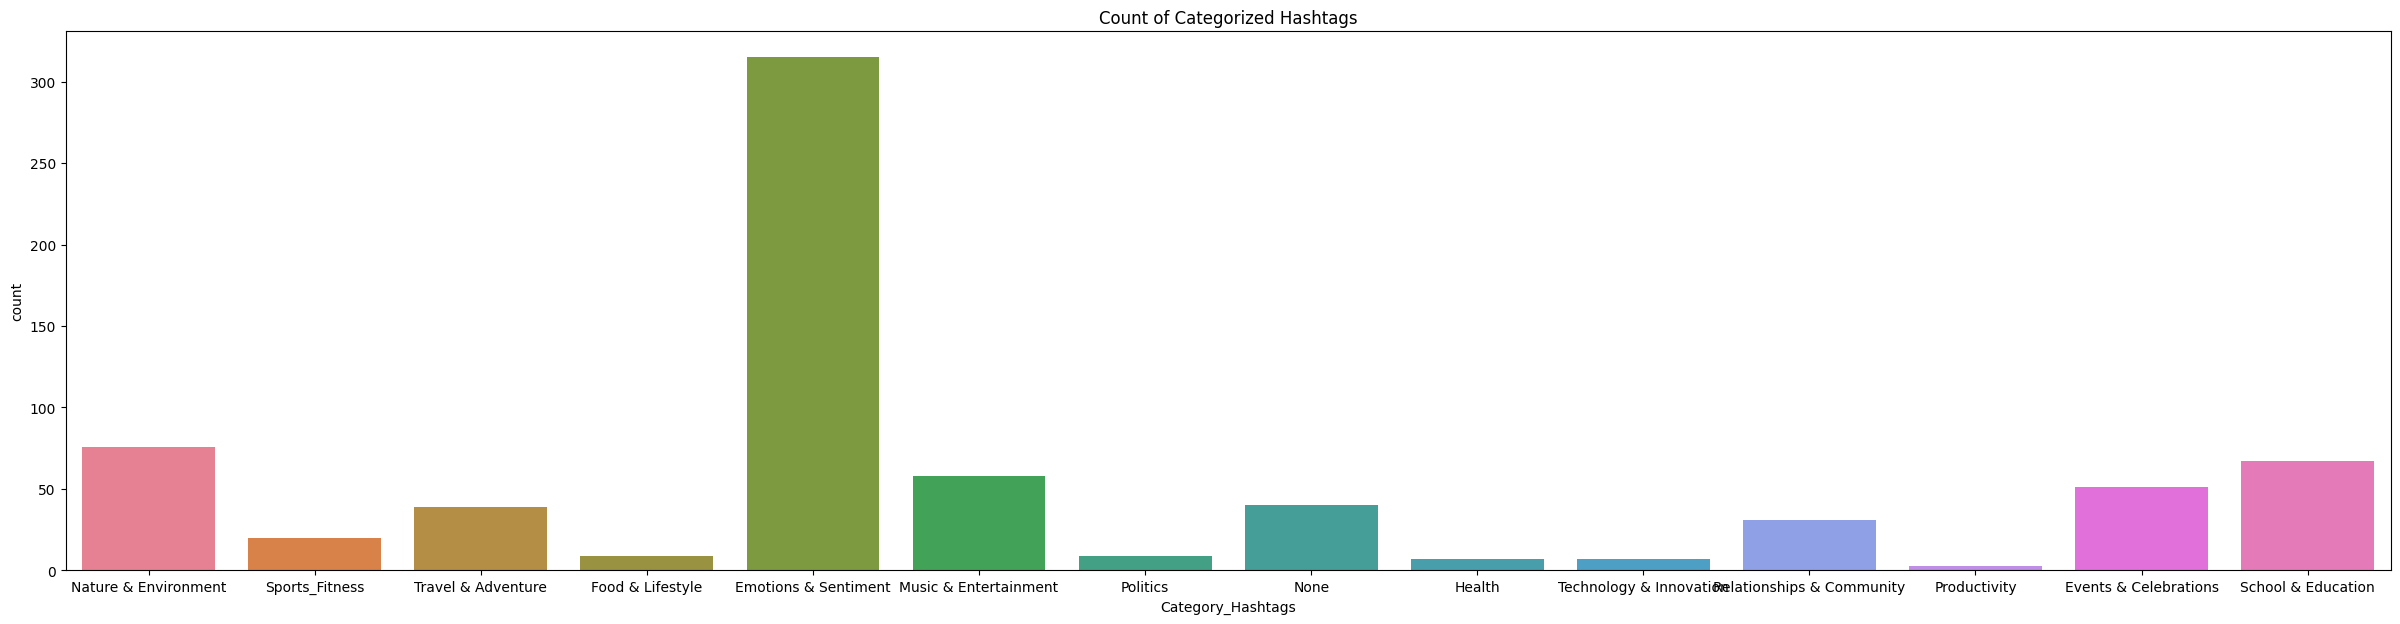

In [30]:
plt.figure(figsize=(30,7))
sns.countplot(x='Category_Hashtags',hue='Category_Hashtags',data=df)
plt.title("Count of Categorized Hashtags")
plt.show()

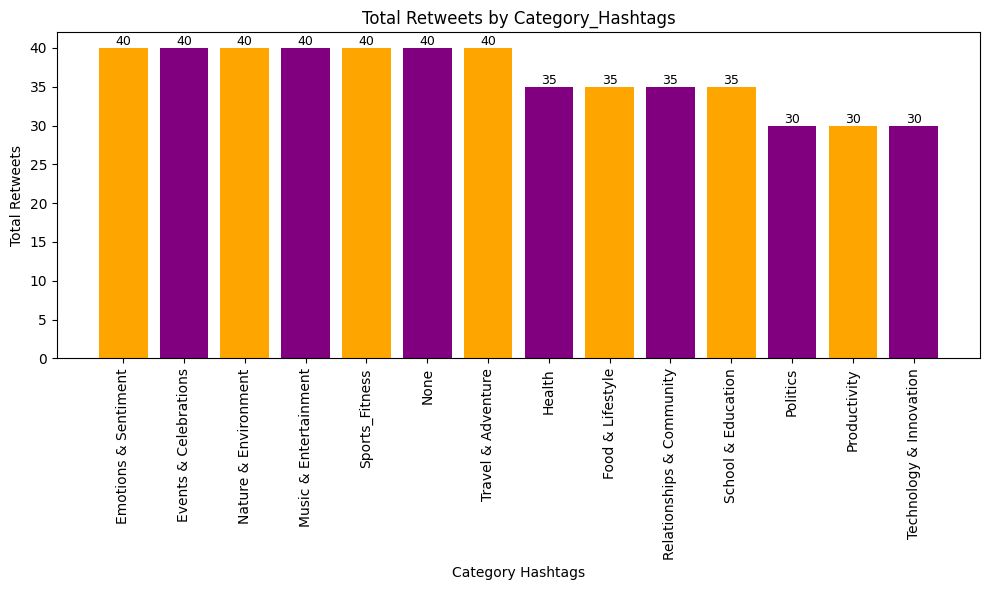

In [70]:
k=df.groupby('Category_Hashtags')['Retweets'].max().sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)

plt.figure(figsize=(10,6))
bars=plt.bar(b['Category_Hashtags'],b['Retweets'],color=['orange','purple'])
plt.xticks(rotation=90)
plt.xlabel("Category Hashtags")
plt.ylabel("Total Retweets")
plt.title("Total Retweets by Category_Hashtags")

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width() / 2,height,f'{int(height)}',ha='center',va='bottom',fontsize=9)
plt.tight_layout()
plt.show()

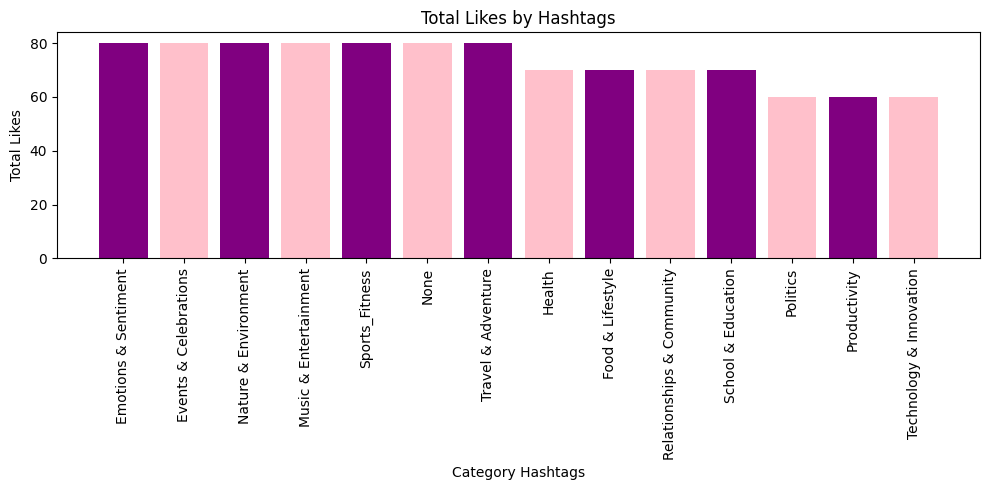

In [32]:
k=df.groupby('Category_Hashtags')['Likes'].max().sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b
plt.figure(figsize=(10,5))
plt.bar(b['Category_Hashtags'],b['Likes'],color=['purple','pink'])
plt.xticks(rotation=90)
plt.xlabel("Category Hashtags")
plt.ylabel("Total Likes")
plt.title("Total Likes by Hashtags")
plt.tight_layout()
plt.show()

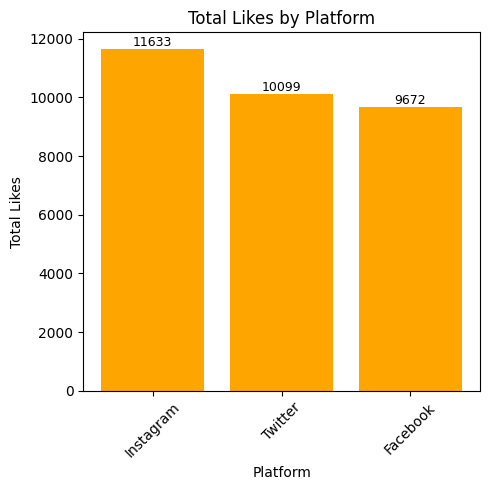

In [69]:
k=df.groupby('Platform')['Likes'].sum().sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b
plt.figure(figsize=(5,5))
bars=plt.bar(b['Platform'],b['Likes'],color=['orange'])
plt.xticks(rotation=45)
plt.xlabel("Platform")
plt.ylabel("Total Likes")

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width() / 2,height,f'{int(height)}',ha='center',va='bottom',fontsize=9)
plt.title("Total Likes by Platform")
plt.tight_layout()
plt.show()

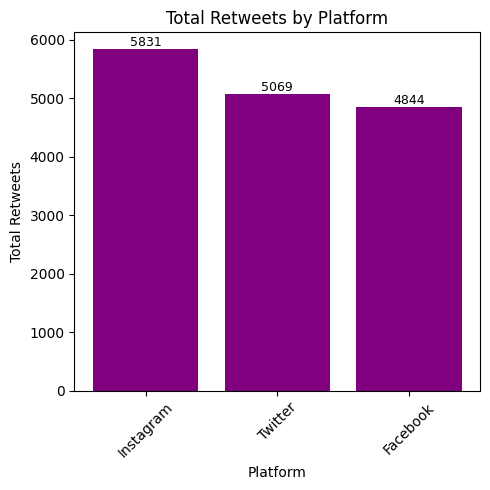

In [86]:
k=df.groupby('Platform')['Retweets'].sum().sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b
plt.figure(figsize=(5,5))
bars=plt.bar(b['Platform'],b['Retweets'],color='purple')
plt.xticks(rotation=45)
plt.xlabel("Platform")
plt.ylabel("Total Retweets")
plt.title("Total Retweets by Platform")

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width() / 2,height,f'{int(height)}',ha='center',va='bottom',fontsize=9)
plt.title("Total Retweets by Platform")
plt.tight_layout()
plt.show()

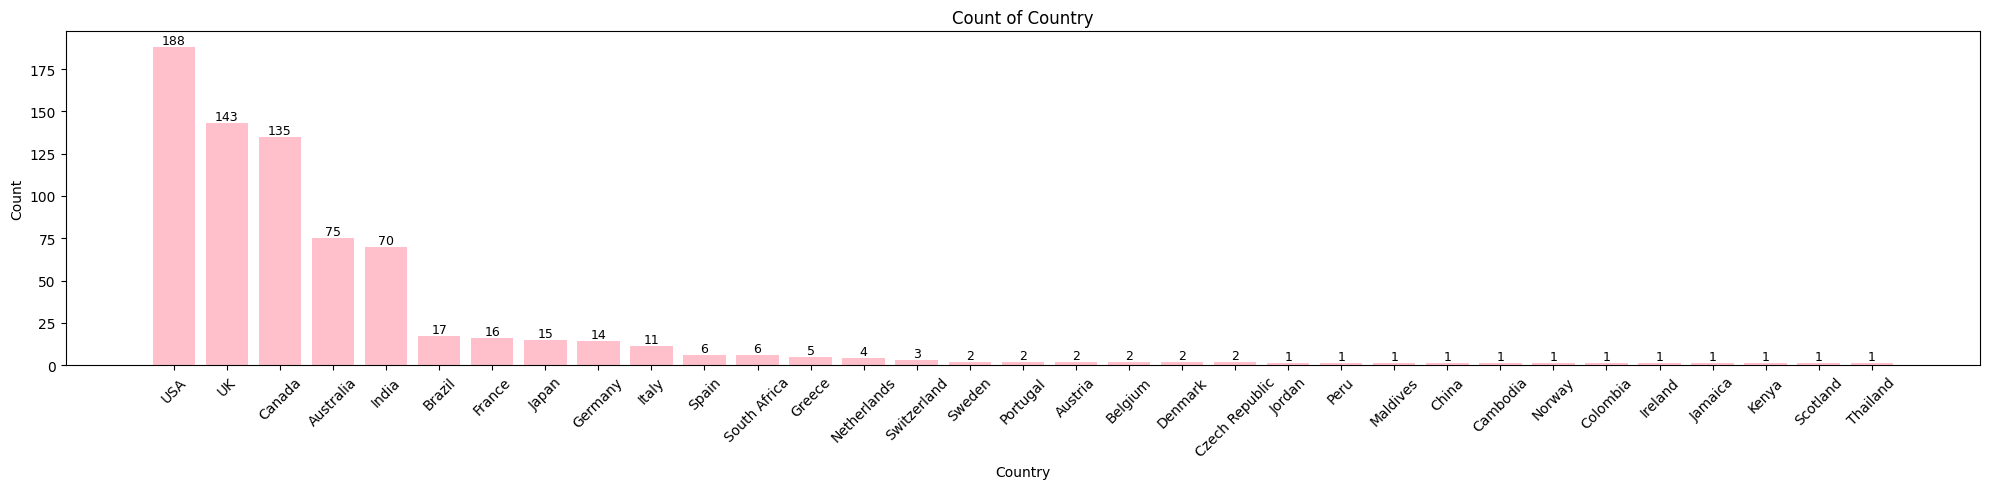

In [121]:
plt.figure(figsize=(20,5))
bars=plt.bar(list(df['Country'].value_counts().keys()),list(df['Country'].value_counts()),color='pink')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Count of Country")

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width() / 2,height,f'{int(height)}',ha='center',va='bottom',fontsize=9)
plt.tight_layout()
plt.show()

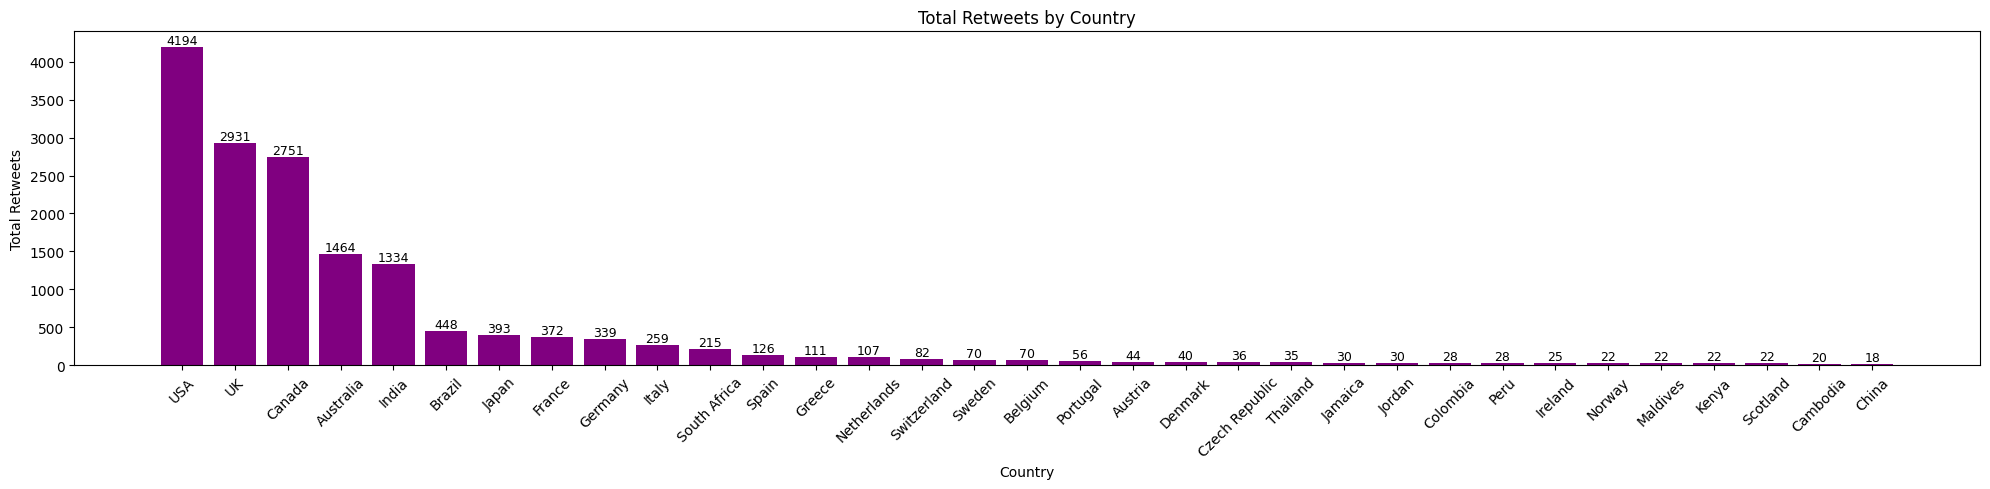

In [122]:
k=df.groupby('Country')['Retweets'].sum().sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b
plt.figure(figsize=(20,5))
bars=plt.bar(b['Country'],b['Retweets'],color='purple')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Retweets")
plt.title("Total Retweets by Country")

for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width() / 2,height,f'{int(height)}',ha='center',va='bottom',fontsize=9)
plt.tight_layout()
plt.show()

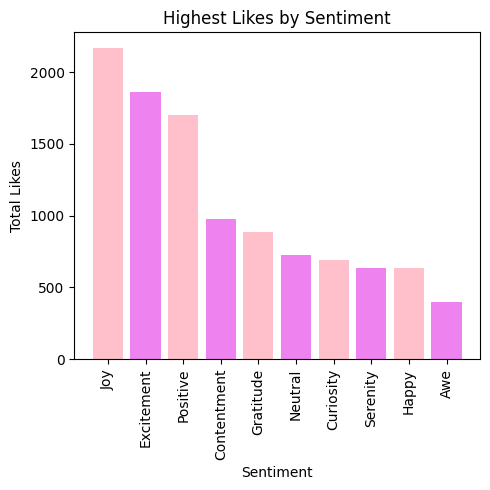

In [84]:
k=df.groupby('Sentiment')['Likes'].sum().nlargest(10).sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b

plt.figure(figsize=(5,5))
plt.bar(b['Sentiment'],b['Likes'],color=['pink','violet'])
plt.title("Highest Likes by Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Sentiment")
plt.ylabel("Total Likes")
plt.tight_layout()
plt.show()

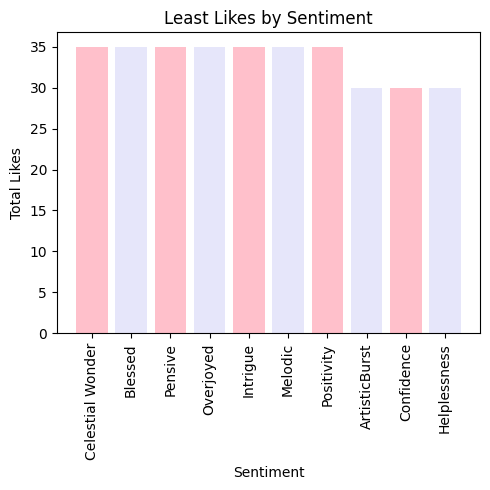

In [81]:
k=df.groupby('Sentiment')['Likes'].sum().nsmallest(10).sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b

plt.figure(figsize=(5,5))
plt.bar(b['Sentiment'],b['Likes'],color=['pink','lavender'])
plt.title("Least Likes by Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Sentiment")
plt.ylabel("Total Likes")
plt.tight_layout()
plt.show()

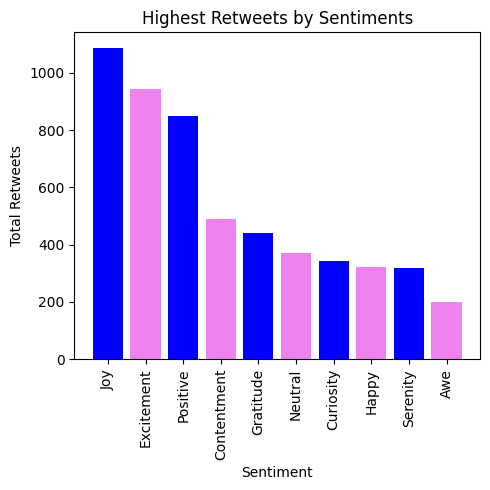

In [82]:
k=df.groupby('Sentiment')['Retweets'].sum().nlargest(10).sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b

plt.figure(figsize=(5,5))
plt.bar(b['Sentiment'],b['Retweets'],color=['b','violet'])
plt.title("Highest Retweets by Sentiments")
plt.xticks(rotation=90)
plt.xlabel("Sentiment")
plt.ylabel("Total Retweets")
plt.tight_layout()
plt.show()

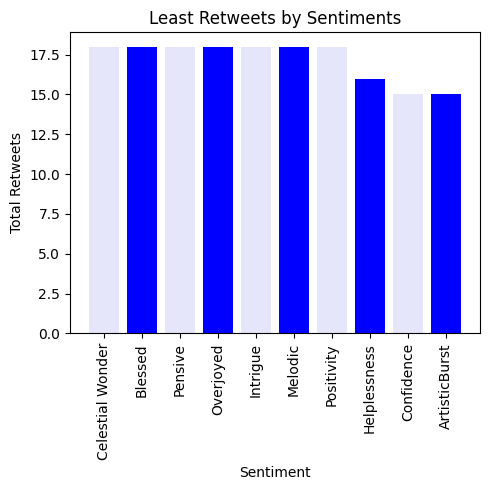

In [83]:
k=df.groupby('Sentiment')['Retweets'].sum().nsmallest(10).sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b

plt.figure(figsize=(5,5))
plt.bar(b['Sentiment'],b['Retweets'],color=['lavender','b'])
plt.title("Least Retweets by Sentiments")
plt.xticks(rotation=90)
plt.xlabel("Sentiment")
plt.ylabel("Total Retweets")
plt.tight_layout()
plt.show()

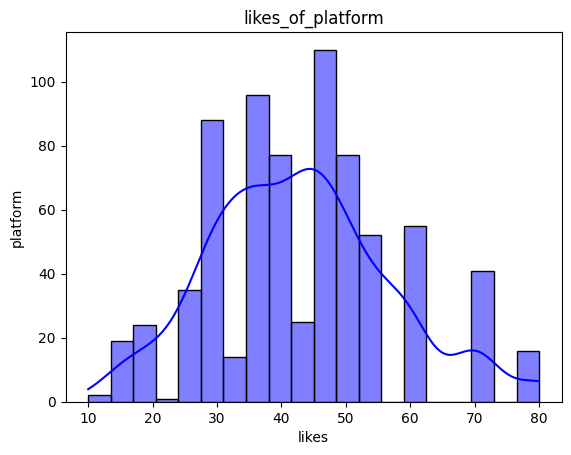

In [61]:
sns.histplot(df['Likes'],bins=20,color='Blue',kde=True)
plt.xlabel("likes")
plt.ylabel("platform")
plt.title("likes_of_platform")
plt.show()

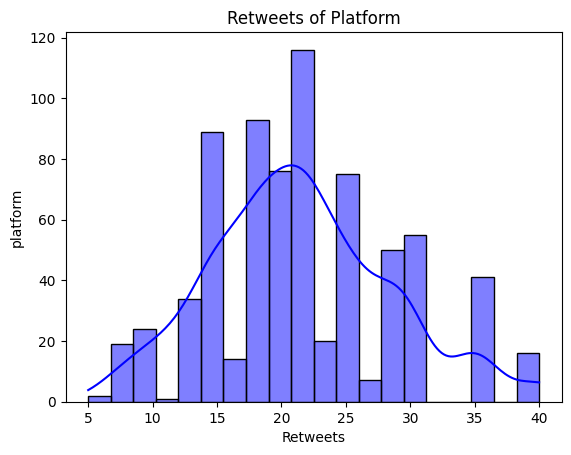

In [87]:
sns.histplot(df['Retweets'],bins=20,color='Blue',kde=True)
plt.xlabel("Retweets")
plt.ylabel("platform")
plt.title("Retweets of Platform")
plt.show()

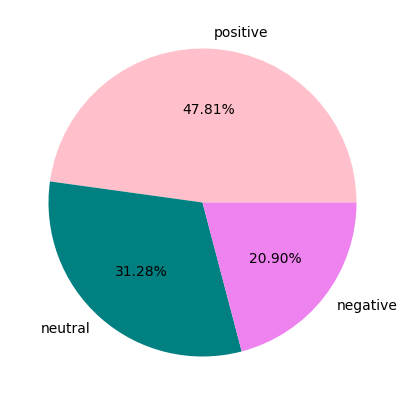

In [56]:
plt.figure(figsize=(5,5))
plt.pie(list(df['Sentiment_Vader'].value_counts()),
        labels=list(df['Sentiment_Vader'].value_counts().keys()),autopct="%0.2f%%",colors=['pink','teal','violet'])
plt.show()

In [88]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Category_Hashtags', 'Cleaned_text1', 'Cleaned_text2', 'Cleaned_text3',
       'Vader_Score', 'Sentiment_Vader'],
      dtype='object')

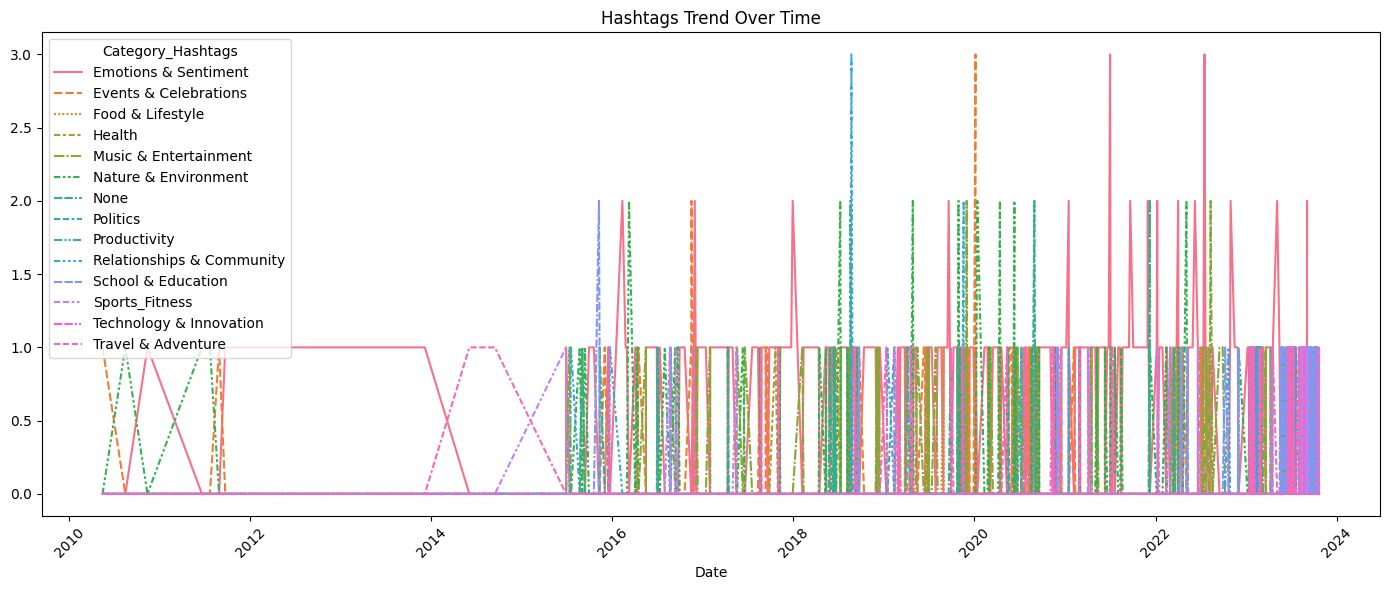

In [97]:
daily_sentiment = df.groupby(['Timestamp', 'Category_Hashtags']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sentiment)
plt.title("Hashtags Trend Over Time")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

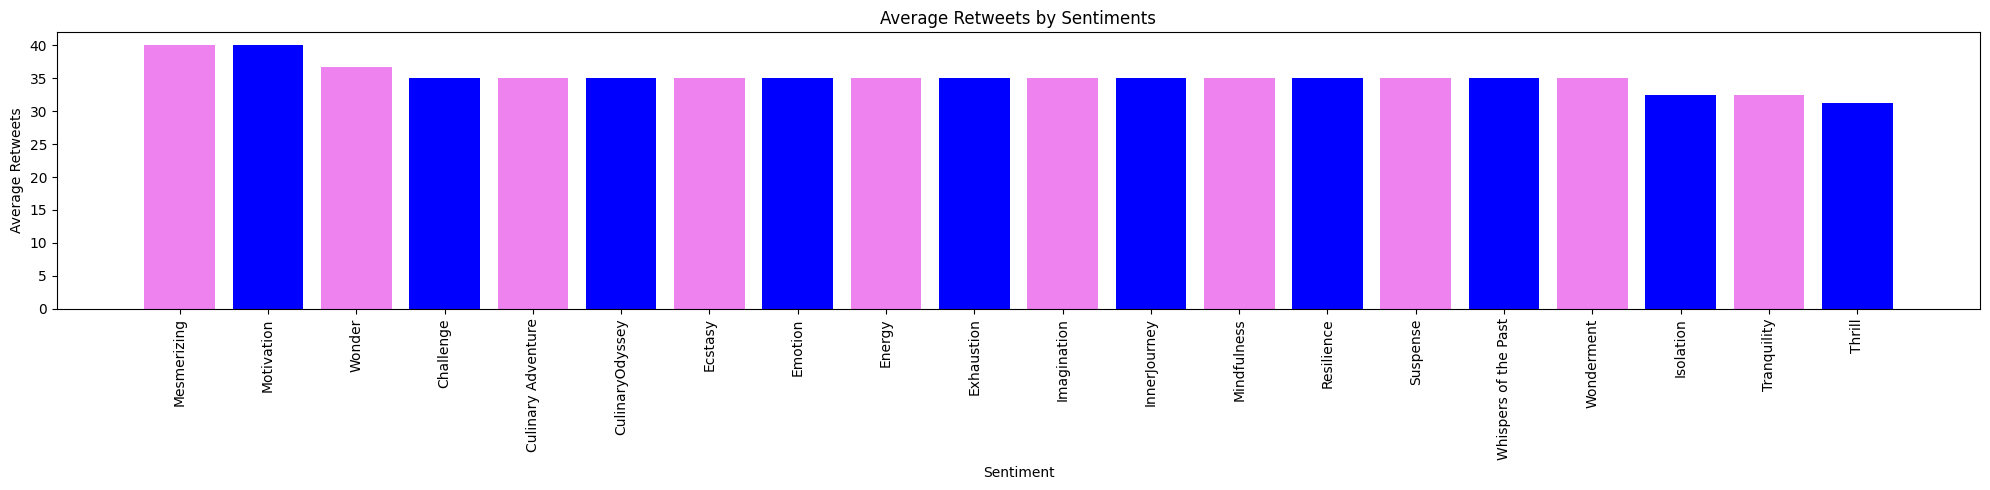

In [105]:
k=df.groupby('Sentiment')['Retweets'].mean().nlargest(20).sort_values(ascending=False).reset_index()
b=pd.DataFrame(k)
b

plt.figure(figsize=(20,5))
plt.bar(b['Sentiment'],b['Retweets'],color=['violet','b'])
plt.title("Average Retweets by Sentiments")
plt.xticks(rotation=90)
plt.xlabel("Sentiment")
plt.ylabel("Average Retweets")
plt.tight_layout()
plt.show()

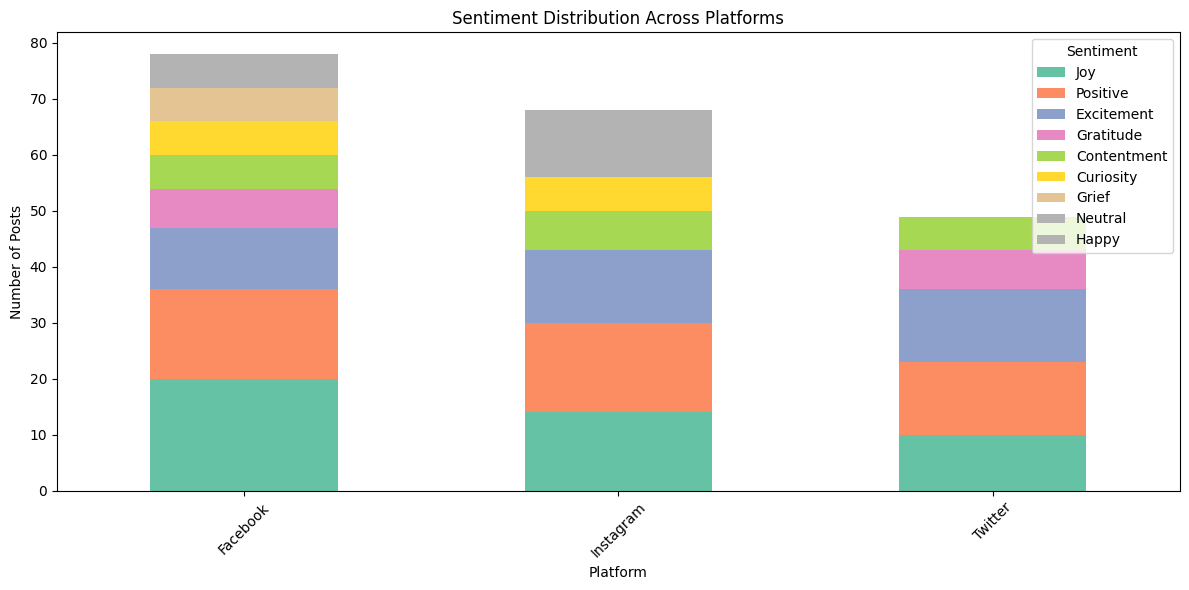

In [123]:
sentiment_platform = df.groupby(['Platform', 'Sentiment']).size().nlargest(20).unstack().fillna(0)

# Plotting the stacked bar chart
sentiment_platform.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Chart customization
plt.title('Sentiment Distribution Across Platforms')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this data, we can see that Users are more likely to post positive sentiments 25% than negative sentiments.Users post more positive content than negative content which can be seen by the Average Retweets vs Sentiment chart. 
Countries 
The Hashtags also concludes that users prefer to post more about Emotions and Sentiments Category Hashtags than other Category Hashtags. Even across the Platform distribution of Sentiments, Positive sentiments are more likely to be posted.